# Decision Trees Regressor

Demonstrating the decision trees model with the california housing dataset and DecisionTreeRegressor class in sklearn

In [38]:
#importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

#to visualize the tree
from sklearn import tree
from sklearn.tree import export_text

In [13]:
np.random.seed(306)

In [14]:
# Using shuffle split as the cross validation strategy
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

## Loading the dataset

In [15]:
# fetch dataset
features, labels = fetch_california_housing(return_X_y=True, as_frame=True)

#train-test split (combined training set)
com_train_features, test_features, com_train_labels, test_labels = train_test_split(features, labels)

#Further splitting of train set into train and development set
train_features, dev_features, train_labels, dev_labels = train_test_split(com_train_features, com_train_labels)

## Model Setup

In [24]:
dt_reg_pipeline = Pipeline([ ('feature_scaling', StandardScaler()),
                            ('dt_reg', DecisionTreeRegressor(max_depth=3, random_state=42)) ])

dt_reg_cv_results = cross_validate(dt_reg_pipeline, 
                                   com_train_features, 
                                   com_train_labels,
                                  cv = cv,
                                  scoring='neg_mean_absolute_error',
                                  return_train_score=True,
                                  return_estimator=True)

dt_reg_train_error = -1 * dt_reg_cv_results['train_score']
dt_reg_test_error = -1 * dt_reg_cv_results['test_score']

print('Mean absolute error on the train set: {:.3f} +/- {:.3f}\n'.format(dt_reg_train_error.mean(),dt_reg_train_error.std()))
print('Mean absolute error on the train set: {:.3f} +/- {:.3f}\n'.format(dt_reg_train_error.mean(),dt_reg_train_error.std()))

Mean absolute error on the train set: 0.592 +/- 0.002

Mean absolute error on the train set: 0.592 +/- 0.002



<b>sklearn.model_selection.cross_validate</b> returns a dictionary containing fit-times, score-times (and optionally training scores as well as fitted estimators) in addition to the test score.

## Visualizing the tree

This can be done in two ways,
1. As a tree diagram
2. As a text based diagram

1. As a tree diagram

In [25]:
#calling fit function on the pipeline object with training data
dt_reg_pipeline.fit(train_features, train_labels)


Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('dt_reg',
                 DecisionTreeRegressor(max_depth=3, random_state=42))])

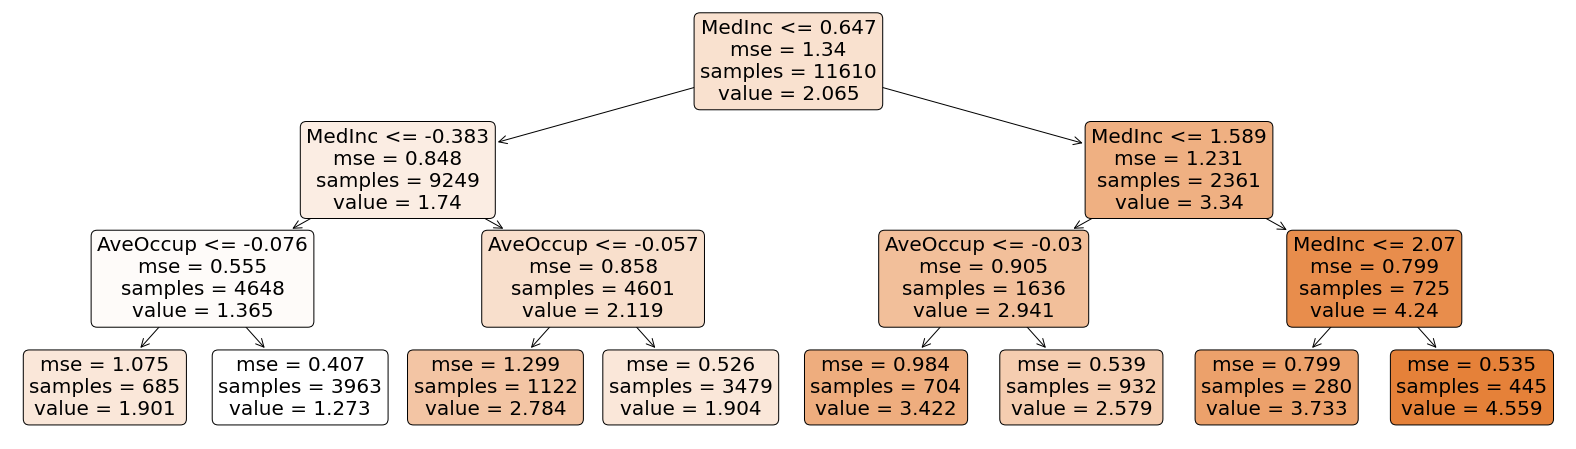

In [33]:
plt.figure(figsize=(28,8),facecolor='w')

a = tree.plot_tree(dt_reg_pipeline[-1],
                  feature_names = features.columns,
                  filled=True,
                  rounded=True,
                  fontsize=20)
plt.show()

* facecolor=background color (w=white)
* filled = When set to True, paint nodes to indicate majority class for classification OR extremity of values for regression, OR purity of node for multi-output.
* rounded = rounded corner


2. As a text based diagram

In [35]:
tree_rules = export_text(dt_reg_pipeline[-1])
print(tree_rules)

|--- feature_0 <= 0.65
|   |--- feature_0 <= -0.38
|   |   |--- feature_5 <= -0.08
|   |   |   |--- value: [1.90]
|   |   |--- feature_5 >  -0.08
|   |   |   |--- value: [1.27]
|   |--- feature_0 >  -0.38
|   |   |--- feature_5 <= -0.06
|   |   |   |--- value: [2.78]
|   |   |--- feature_5 >  -0.06
|   |   |   |--- value: [1.90]
|--- feature_0 >  0.65
|   |--- feature_0 <= 1.59
|   |   |--- feature_5 <= -0.03
|   |   |   |--- value: [3.42]
|   |   |--- feature_5 >  -0.03
|   |   |   |--- value: [2.58]
|   |--- feature_0 >  1.59
|   |   |--- feature_0 <= 2.07
|   |   |   |--- value: [3.73]
|   |   |--- feature_0 >  2.07
|   |   |   |--- value: [4.56]



## Using the tree for prediction

In [36]:
test_labels_pred = dt_reg_pipeline.predict(test_features)

In [39]:
mae = mean_absolute_error(test_labels, test_labels_pred)
mse = mean_squared_error(test_labels, test_labels_pred)
r2 = r2_score(test_labels, test_labels_pred)

print(f"MAE: {mae}, MSE: {mse}, r2 score: {r2}")

MAE: 0.5900147002557813, MSE: 0.6067337859571069, r2 score: 0.5344273102846204
